In [1]:
from Initialize import load_trainer_model
from tairvision.utils import retry_if_cuda_oom
import argparse

dcn_v2 is not imported
skcuda or pycuda is not imported
skcuda is not imported
skcuda is not imported


In [2]:
def visualize(yaml_location, max_count):
    trainer = load_trainer_model(yaml_location, evaluation_mode=True, deployment_mode=False,
                                 evaluation_torch_device="cuda:0", evaluation_load_mode="final")

    trainer.model.eval()
    for count, (images, labels) in enumerate(trainer.val_loader):
        images, targets = trainer.to_device(images, labels)

        head_outputs = trainer.model(images)
        # trainer.visualize_heatmaps(head_outputs)
        outputs = retry_if_cuda_oom(trainer.postprocess_outputs)(head_outputs)
        trainer.visualize(image=images,
                          ground_truth=labels,
                          outputs=outputs,
                          show=True,
                          wandb_log_name="deneme",
                          save_images_to_local=False,
                          image_name=f"sample_{count}")

        print(count)
        if count == max_count-1:
            break


evaluation mode is enabled...
load mode is final
Mixed Precision Training is set to False
Wandb enabled is set to False
Evaluation torch device is set to cuda:0
Evaluation batch size is set to 1
Evaluation number of workers is set to 0
Deployment mode is False
Return dataset info is set to False
Wandb run-id is not set
Opt_level is O3
--- old version ---
backbone.conv1.weight
backbone.bn1.weight
backbone.bn1.bias
backbone.layer1.0.conv1.weight
backbone.layer1.0.bn1.weight
backbone.layer1.0.bn1.bias
backbone.layer1.0.conv2.weight
backbone.layer1.0.bn2.weight
backbone.layer1.0.bn2.bias
backbone.layer1.1.conv1.weight
backbone.layer1.1.bn1.weight
backbone.layer1.1.bn1.bias
backbone.layer1.1.conv2.weight
backbone.layer1.1.bn2.weight
backbone.layer1.1.bn2.bias
backbone.layer2.0.conv1.weight
backbone.layer2.0.bn1.weight
backbone.layer2.0.bn1.bias
backbone.layer2.0.conv2.weight
backbone.layer2.0.bn2.weight
backbone.layer2.0.bn2.bias
backbone.layer2.0.downsample.0.weight
backbone.layer2.0.downs

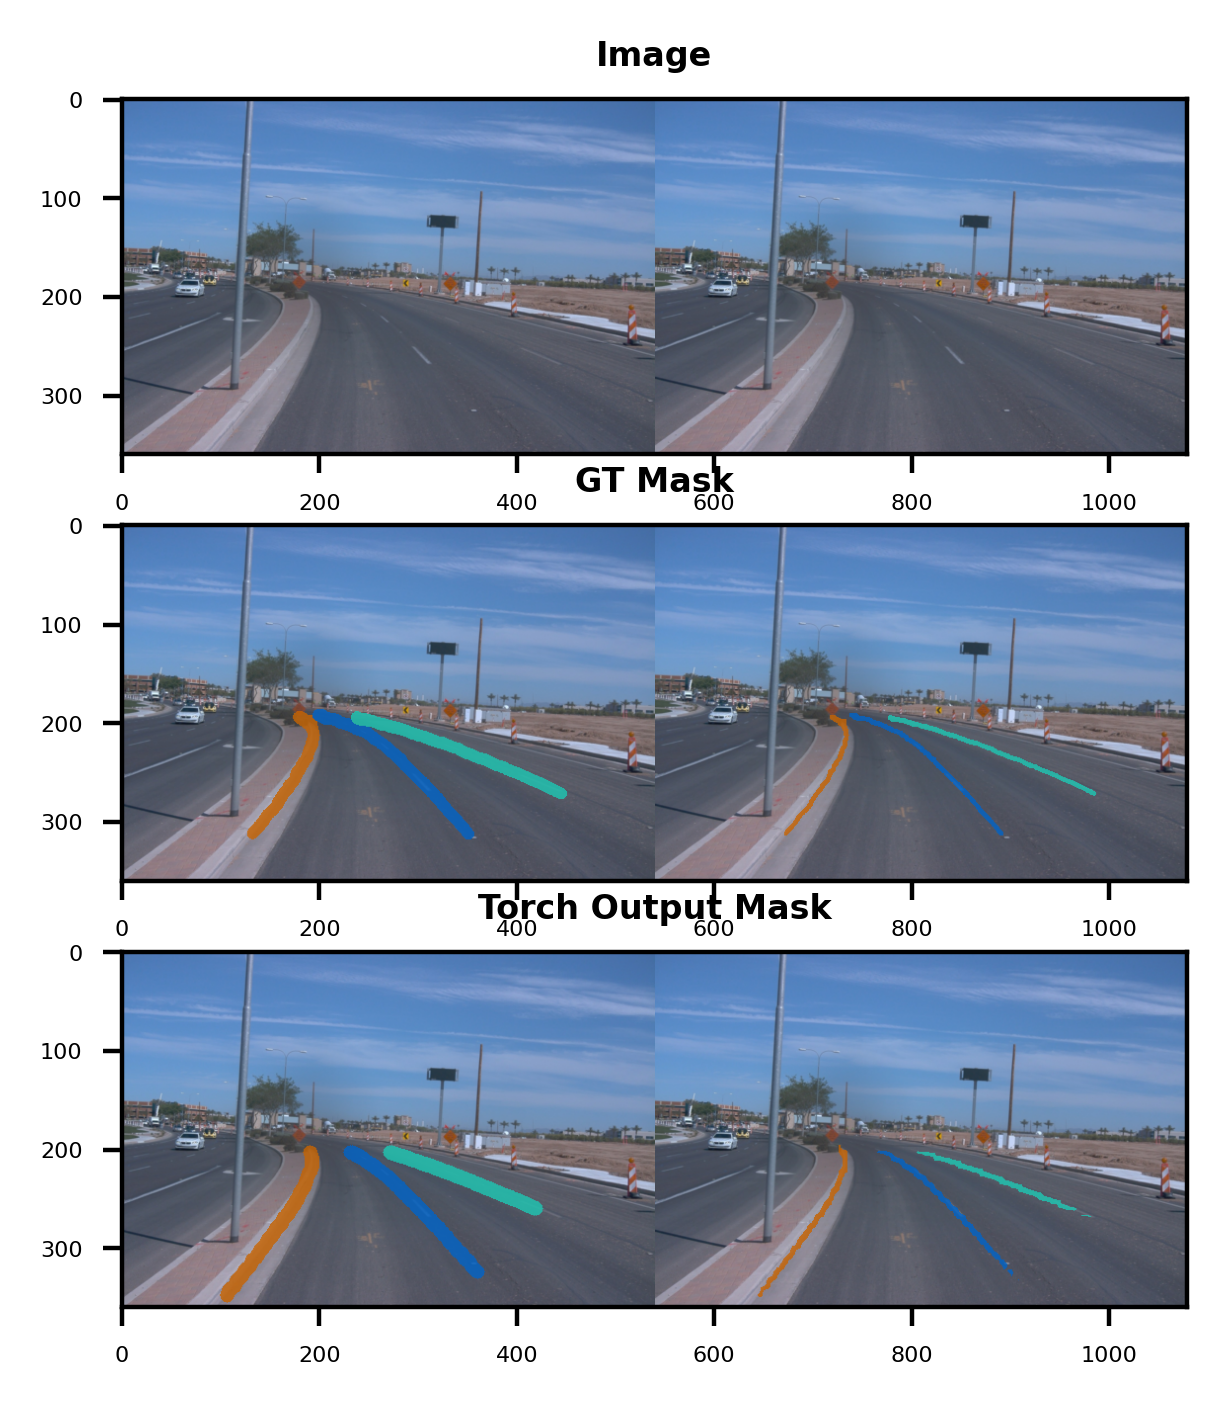

0


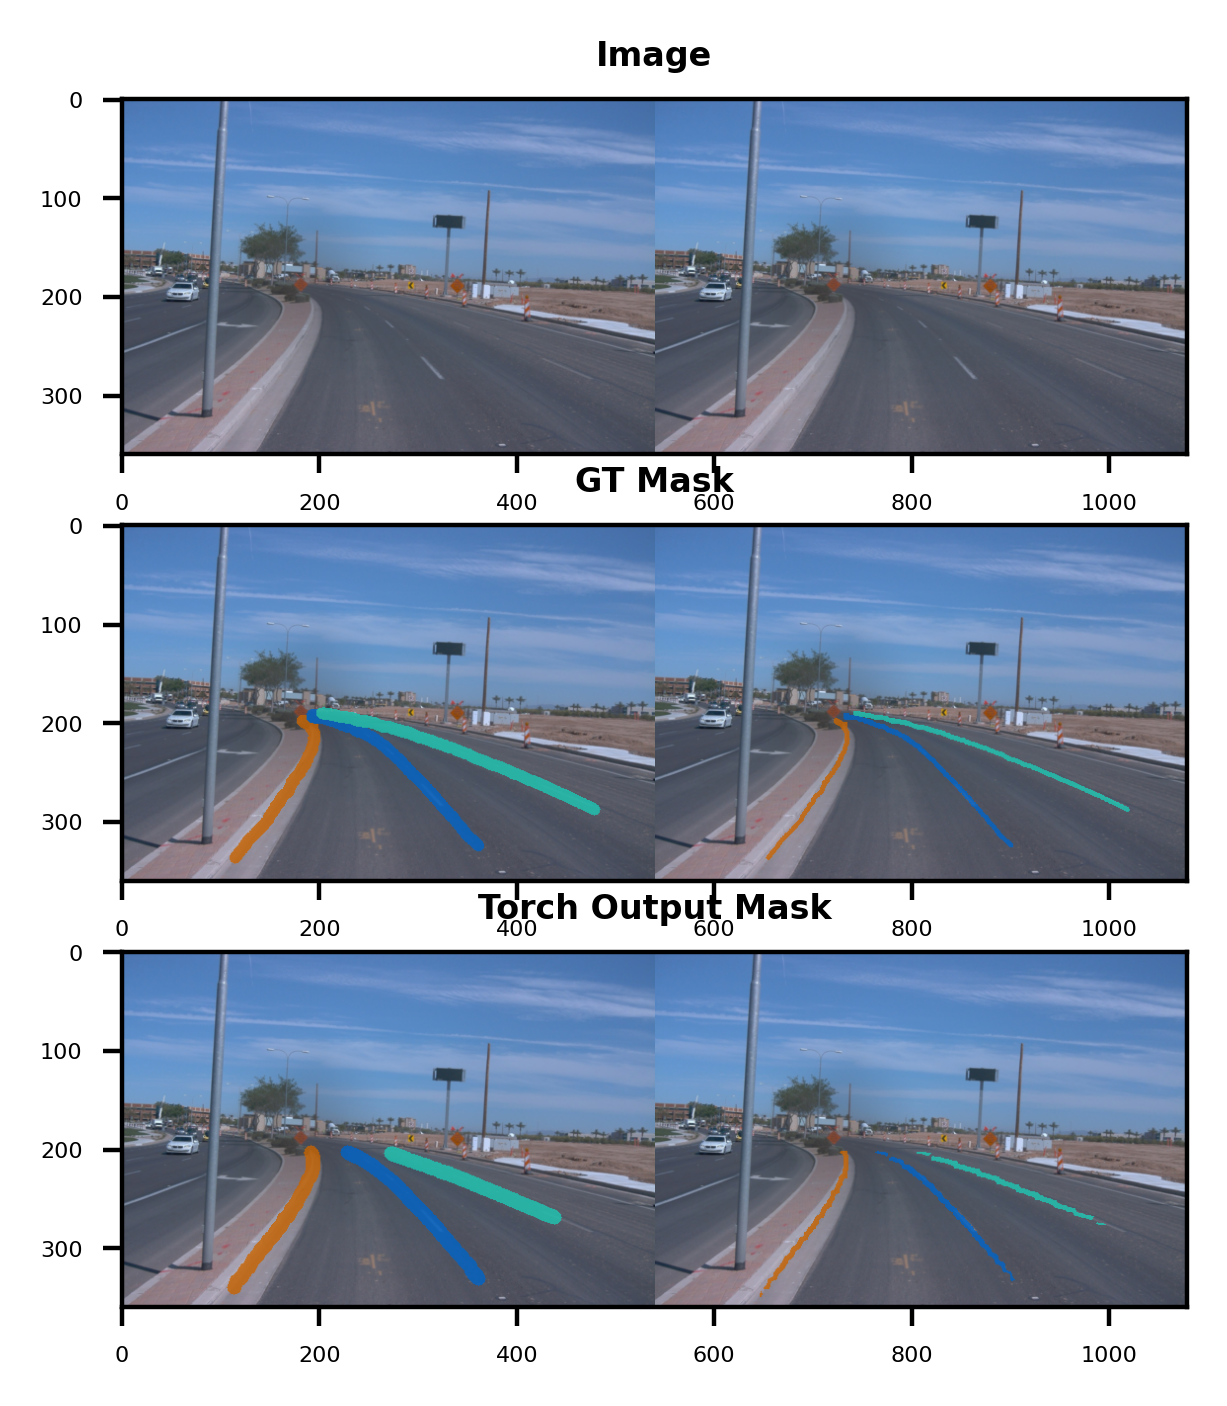

1


In [3]:
visualize("settings/Deeplab/deeplabv3_resnet18_openlane_lanetrainer_640x360_wo_uncertain.yml", 2)